## Goal:
### Finding IPhone Users reaction towards Android Tweets
- To get Android tweets,iam using Twitter account of Android.

- Using tweepy and pickle,creating Android account pickle file.

In [3]:
import tweepy
from twitter_keys import consumer_key, consumer_secret, access_token, access_secret
import pickle
from nltk_helpers import get_sentiments
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

public_tweets = api.user_timeline('Android')

with open('android_tweets.pkl', 'wb') as f:
    pickle.dump(public_tweets, f)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\s534690\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Data collection
- To get replys for each tweet done by Android Account,iam using tweepy.Cursor.
- Using tweepy.Cursor,iam selecting replys done by iphone users.
- Iam selecting four pages of android account,which contains approxmately 120 replys done by iphone users.
### Sentiment analysis
- Using sentiment analysis to analyse the data.

In [4]:
with open('android_tweets.pkl', 'rb') as f:
    public_tweets = pickle.load(f)
android=[]
iphone=[]
for page in tweepy.Cursor(api.search, q='@Android', count=100, tweet_mode='extended').pages(4):
    for devices in page:
        if devices._json['source']=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
            iphone.append(get_sentiments(devices._json['full_text']))


### Visualization of results:
#### scatter graph:
- Visualizing data using scatter graph where Negative and positive sentiments are x and y axis.

In [11]:
import matplotlib.pyplot as plt
xs = []
for sent in iphone:
    xs.append(sent['neg'])

ys = [sent['neu'] for sent in iphone]
zs = list(map(lambda x: x['pos'], iphone))


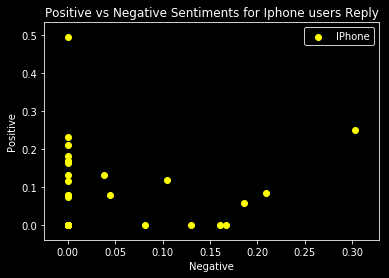

In [6]:
import matplotlib.style as style
style.use('dark_background')
plt.scatter(xs, zs, label='IPhone',color='yellow')
plt.xlabel('Negative')
plt.ylabel('Positive')
plt.title('Positive vs Negative Sentiments for Iphone users Reply')
plt.legend(loc='upper right', shadow=True)
plt.savefig("scat.png",transparent='True')
plt.show()

#### Histogram
- Compound values and Number of Iphone users are x and y axis for the below histogram.

In [7]:


i=[]
a=[]
for values in iphone:
    i.append(values['neg'])
for values in iphone:
    a.append(values['pos'])

In [8]:
import matplotlib.pyplot as plt
ci=[]
for values in iphone:
    ci.append(values['compound'])

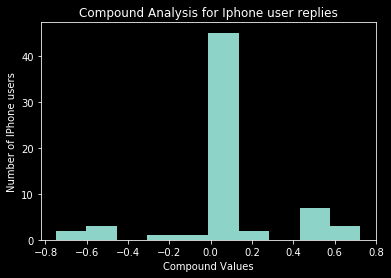

In [9]:
plt.hist(list(ci))
plt.title('Compound Analysis for Iphone user replies')
plt.ylabel('Number of IPhone users')
plt.xlabel('Compound Values')
plt.savefig("bar.png",transparent='True')

#### Pie chart:
- Based on sentiment analysis,representing sentiments using pie chart.


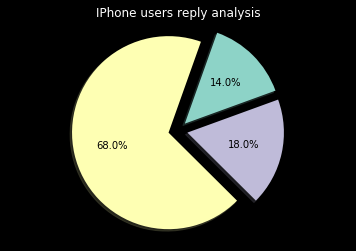

In [10]:
sizes = [14,68,18]
explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=20,textprops={'color':'black'})
ax1.axis('equal')
plt.title('IPhone users reply analysis')
plt.savefig("pie.png",transparent='True')
plt.show()


#### Conclusions/outcomes:
- Based on the results I can make some assertions.
- IPhone users are not so positive towards tweets done in Android account which resembles that they are not much satisfied with tweets.
- Approximately 85% of IPhone users are neutral and negative  when there is a tweet in Android account.